# The Great Resignation Mystery
### A Corporate Thriller in Python

---

**Date:** 26th December 2024  
**Client:** Terrified HR Department  
**Case:** Employees vanishing into thin air  
**Weapon of Choice:** Scikit-learn, Pandas, and questionable coffee

---

## The Phone Call

HR burst through my office door at 3 AM, mascara running, clutching a USB drive like it contained nuclear codes.

*"They're leaving,"* she whispered. *"One by one. No warning. No goodbye emails. Just... gone."*

I took the drive. 1,470 employee records. 35 columns of corporate secrets.

*"Find out who's next,"* she begged. *"Before the board meeting."*

I lit a cigarette I don't smoke and opened Jupyter Notebook.

---

## The Evidence Bag

| What We Got | Details |
|-------------|---------|
| **Victims** | 1,470 IBM employees (past and present) |
| **Crime Scene** | 35 features - age, salary, overtime, satisfaction scores |
| **The Question** | Who's about to ghost this company? |
| **Timeline** | Before the CEO's blood pressure kills him |

---

## The Game Plan

1. **Scene Investigation** - Crack open the data, check for missing bodies
2. **Suspect Profiling** - Who leaves? Who stays? What's the pattern?
3. **Weapon Selection** - Random Forest (because one tree is never enough)
4. **The Prediction** - Flag the flight risks before they book one-way tickets

---

*"You want the truth?"* I muttered, importing libraries.

*"Can you handle it?"* the data whispered back.

**Let's find out.**

---

## Chapter 0: Setup

### Imports

In [1]:
import pandas as pd
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
# Download latest version
path = kagglehub.dataset_download("ajinkyachintawar/employee-attrition-and-retention-analytics-dataset")

print("Path to dataset files:", path)

100%|██████████| 50.2k/50.2k [00:00<00:00, 1.25MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ajinkyachintawar/employee-attrition-and-retention-analytics-dataset/versions/1


In [3]:
print(os.listdir(path))

['HR-Employee-Attrition.csv']


In [6]:
df = pd.read_csv(os.path.join(path,'HR-Employee-Attrition.csv'))
print(f"Dataset Shape: {df.shape}")
print(f"\nTarget Distribution:")
print(df['Attrition'].value_counts())
print(f"\nAttrition Rate: {(df['Attrition']=='Yes').mean()*100:.1f}%")
print(df.head())

Dataset Shape: (1476, 35)

Target Distribution:
Attrition
No        1233
Yes        237
 10:07       1
 15:16       1
 12:15       1
 14:15       1
 10:09       1
 16:24       1
Name: count, dtype: int64

Attrition Rate: 16.1%
  Age Attrition     BusinessTravel  DailyRate              Department  \
0  41       Yes      Travel_Rarely     1102.0                   Sales   
1  49        No  Travel_Frequently      279.0  Research & Development   
2  37       Yes      Travel_Rarely     1373.0  Research & Development   
3  33        No  Travel_Frequently     1392.0  Research & Development   
4  27        No      Travel_Rarely      591.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0        2.0  Life Sciences            1.0             1.0   
1               8.0        1.0  Life Sciences            1.0             2.0   
2               2.0        2.0          Other            1.0             4.0   
3             

## Chapter 1: Opening the Case File

**Status:** Evidence contaminated

We cracked open the USB drive expecting clean records. Instead...

| Finding | Value |
|---------|-------|
| Total Records | 1,476 |
| Variables | 35 |
| Clean "Yes/No" | 1,470 |
| **Corrupted Rows** | **6 mystery timestamps** |

Someone spilled coffee on the spreadsheet. Or worse - sabotage.

*"10:07... 15:16..."* I muttered. *"These aren't resignation statuses. These are timestamps. Someone's hiding something."*

Before we hunt the quitters, we gotta clean the crime scene.

---

### Cleanup

In [7]:
# Something's wrong... timestamps in Attrition column?
print("[EVIDENCE CONTAMINATION DETECTED]")
print(f"\nAttrition values found:")
print(df['Attrition'].value_counts())

# Keep only valid Yes/No responses
valid_attrition = df['Attrition'].isin(['Yes', 'No'])
print(f"\nCorrupted rows: {(~valid_attrition).sum()}")

# Clean the scene
df = df[valid_attrition].copy()
print(f"\n[AFTER CLEANUP]")
print(f"Remaining suspects: {len(df)}")
print(f"Attrition Rate: {(df['Attrition']=='Yes').mean()*100:.1f}%")

print("\n6 contaminated records tossed in the shredder.")
print("Now we work with clean evidence.")

[EVIDENCE CONTAMINATION DETECTED]

Attrition values found:
Attrition
No        1233
Yes        237
 10:07       1
 15:16       1
 12:15       1
 14:15       1
 10:09       1
 16:24       1
Name: count, dtype: int64

Corrupted rows: 6

[AFTER CLEANUP]
Remaining suspects: 1470
Attrition Rate: 16.1%

6 contaminated records tossed in the shredder.
Now we work with clean evidence.


## Chapter 2: Cleaning the Crime Scene

**6 bodies removed. No questions asked.**

The intern probably copy-pasted from the wrong column. Classic.

| Before | After |
|--------|-------|
| 1,476 records | 1,470 records |
| Timestamps in Attrition | Pure Yes/No |
| Chaos | Order |

**The Real Numbers:**
- **Stayed:** 1,233 employees (83.9%)
- **Ghosted:** 237 employees (16.1%)

*"16 percent,"* I whispered. *"One in six walked out the door."*

That's not a resignation rate. That's a **slow hemorrhage.**

Time to see what we're working with.

---

In [8]:
print("="*60)
print("EXAMINING THE EVIDENCE")
print("="*60)

# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)

print("\n[MISSING EVIDENCE CHECK]")
if missing.sum() == 0:
    print("No missing values. Suspiciously clean.")
else:
    print(missing[missing > 0])

# Data types breakdown
print(f"\n[VARIABLE TYPES]")
print(f"Numerical clues: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"Categorical clues: {df.select_dtypes(include=['object']).shape[1]}")

# Quick look at numericals
print(f"\n[NUMERICAL SUMMARY - The Money Trail]")
key_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome']
df[key_cols].describe().round(1)

EXAMINING THE EVIDENCE

[MISSING EVIDENCE CHECK]
No missing values. Suspiciously clean.

[VARIABLE TYPES]
Numerical clues: 25
Categorical clues: 10

[NUMERICAL SUMMARY - The Money Trail]


,MonthlyIncome,YearsAtCompany,DistanceFromHome
count,1470.0,1470.0,1470.0
mean,6502.9,7.0,9.2
std,4708.0,6.1,8.1
min,1009.0,0.0,1.0
25%,2911.0,3.0,2.0
50%,4919.0,5.0,7.0
75%,8379.0,9.0,14.0
max,19999.0,40.0,29.0


## Chapter 3: Examining the Evidence

**Status:** Suspiciously clean. Too clean.

No missing values. In 20 years of data detective work, I've never seen a corporate dataset this pristine. Someone scrubbed this before handing it over.

*Either HR is competent, or they're hiding something.*

| Evidence Type | Count |
|---------------|-------|
| Numerical clues | 25 |
| Categorical clues | 10 |
| Missing values | 0 (suspicious) |

**The Money Trail:**

| Stat | Age | Monthly Income | Years at Company | Distance from Home |
|------|-----|----------------|------------------|-------------------|
| Average | 37 | $6,503 | 7 years | 9 miles |
| Minimum | 18 | $1,009 | 0 years | 1 mile |
| Maximum | 60 | $19,999 | 40 years | 29 miles |

*"Forty years..."* I stared at the screen. *"Someone's been here four decades and we're worried about retention?"*

The spread is wild. Fresh grads making a grand, veterans pulling 20K.

**The real question:** Who's walking out, and why?

---

In [9]:
print("="*60)
print("THE USUAL SUSPECTS - Categorical Clues")
print("="*60)

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    print(f"\n[{col.upper()}]")
    print(df[col].value_counts().to_string())

THE USUAL SUSPECTS - Categorical Clues

[AGE]
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4

[ATTRITION]
Attrition
No     1233
Yes     237

[BUSINESSTRAVEL]
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150

[DEPARTMENT]
Department
Research & Development    961
Sales                     446
Human Resources            63

[EDUCATIONFIELD]
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27

[GENDER]
Gender
Male      882
Female    588

[JOBROLE]
JobRole
Sales Executive              326
Research Scienti

## Chapter 4: The Usual Suspects

Time to profile the workforce. Who are these people?

### Department Breakdown
| Department | Headcount | Vibe |
|------------|-----------|------|
| Research & Development | 961 (65%) | The nerds. Lab coats and late nights. |
| Sales | 446 (30%) | The talkers. Commission breath. |
| Human Resources | 63 (4%) | The watchers. Ironic they called *me*. |

### The Travel Situation
- **Travel Rarely:** 1,043 - Desk creatures
- **Travel Frequently:** 277 - Living in airports
- **Non-Travel:** 150 - Haven't seen sunlight since onboarding

### Overtime Status
| Status | Count | Translation |
|--------|-------|-------------|
| No Overtime | 1,054 (72%) | Work-life balance believers |
| Yes Overtime | 416 (28%) | *"Just one more email"* victims |

### Other Notes
- **Over18:** Everyone is an adult. Thanks for confirming, HR.
- **Gender:** 60% male, 40% female
- **Married:** 46% | **Single:** 32% | **Divorced:** 22%

*"Overtime..."* I circled it in red. *"28% burning the midnight oil. That's a lead."*

The Research nerds outnumber everyone 2:1. If attrition is hitting hard, it's hitting them hardest.

**Let's see who's actually leaving.**

---

In [10]:
print("="*60)
print("DEFECTOR PROFILING - Who's Actually Leaving?")
print("="*60)

# Attrition rate by key categories
def attrition_rate(column):
    return df.groupby(column)['Attrition'].apply(lambda x: (x=='Yes').mean()*100).round(1)

print("\n[BY OVERTIME]")
print(attrition_rate('OverTime').sort_values(ascending=False).to_string())

print("\n[BY BUSINESS TRAVEL]")
print(attrition_rate('BusinessTravel').sort_values(ascending=False).to_string())

print("\n[BY DEPARTMENT]")
print(attrition_rate('Department').sort_values(ascending=False).to_string())

print("\n[BY MARITAL STATUS]")
print(attrition_rate('MaritalStatus').sort_values(ascending=False).to_string())

print("\n[BY JOB ROLE]")
print(attrition_rate('JobRole').sort_values(ascending=False).to_string())

DEFECTOR PROFILING - Who's Actually Leaving?

[BY OVERTIME]
OverTime
Yes    30.5
No     10.4

[BY BUSINESS TRAVEL]
BusinessTravel
Travel_Frequently    24.9
Travel_Rarely        15.0
Non-Travel            8.0

[BY DEPARTMENT]
Department
Sales                     20.6
Human Resources           19.0
Research & Development    13.8

[BY MARITAL STATUS]
MaritalStatus
Single      25.5
Married     12.5
Divorced    10.1

[BY JOB ROLE]
JobRole
Sales Representative         39.8
Laboratory Technician        23.9
Human Resources              23.1
Sales Executive              17.5
Research Scientist           16.1
Healthcare Representative     6.9
Manufacturing Director        6.9
Manager                       4.9
Research Director             2.5


## Chapter 5: The Defector Profile

**BINGO.** The pattern emerges from the smoke.

### The Smoking Guns

| Factor | Attrition Rate | Verdict |
|--------|----------------|---------|
| **Overtime: Yes** | **30.5%** | 3x more likely to quit than non-overtime |
| **Overtime: No** | 10.4% | They're fine |

*"Work them to death, they walk."* Groundbreaking insight. Someone call Harvard.

### The Travel Curse

| Travel Status | Attrition Rate |
|---------------|----------------|
| Travel Frequently | 24.9% |
| Travel Rarely | 15.0% |
| Non-Travel | 8.0% |

Living in airports = 3x more likely to ghost than desk dwellers.

### The Lonely Hearts Club

| Marital Status | Attrition Rate |
|----------------|----------------|
| **Single** | **25.5%** |
| Married | 12.5% |
| Divorced | 10.1% |

Singles leave. Married folks got mortgages. Divorced already experienced worse pain.

### The Job Role Massacre

| Role | Attrition | Notes |
|------|-----------|-------|
| **Sales Representative** | **39.8%** | 4 out of 10 GONE |
| Laboratory Technician | 23.9% | Underpaid nerds |
| Human Resources | 23.1% | Even HR is leaving HR |
| Research Director | 2.5% | They're not going anywhere |
| Manager | 4.9% | Golden handcuffs work |

*"Sales Reps..."* I lit another fake cigarette. *"40% attrition. That's not a job, that's a revolving door."*

**The profile is clear:** Overworked, over-traveled, underpaid singles in Sales.

---

In [12]:
print("="*60)
print("THE NUMBERS GAME - What the data whispers")
print("="*60)

# Convert 'Age' to numeric, coercing errors will turn non-convertible values into NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Compare means for key numerical variables
num_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole',
            'TotalWorkingYears', 'DistanceFromHome', 'NumCompaniesWorked']

attrition_comparison = df.groupby('Attrition')[num_cols].mean().round(1).T
attrition_comparison['Difference'] = attrition_comparison['Yes'] - attrition_comparison['No']
attrition_comparison['% Diff'] = ((attrition_comparison['Yes'] - attrition_comparison['No']) / attrition_comparison['No'] * 100).round(1)

print("\n[STAYERS vs LEAVERS - Average Comparison]")
print(attrition_comparison.to_string())

print("\n" + "="*60)
print("Negative difference = Leavers have LESS of it")
print("="*60)

THE NUMBERS GAME - What the data whispers

[STAYERS vs LEAVERS - Average Comparison]
Attrition               No     Yes  Difference  % Diff
Age                   37.6    33.6        -4.0   -10.6
MonthlyIncome       6832.7  4787.1     -2045.6   -29.9
YearsAtCompany         7.4     5.1        -2.3   -31.1
YearsInCurrentRole     4.5     2.9        -1.6   -35.6
TotalWorkingYears     11.9     8.2        -3.7   -31.1
DistanceFromHome       8.9    10.6         1.7    19.1
NumCompaniesWorked     2.6     2.9         0.3    11.5

Negative difference = Leavers have LESS of it


## Chapter 6: The Numbers Game

**The spreadsheet doesn't lie. People do. Numbers don't.**

### Stayers vs Leavers - The Cold Hard Truth

| Variable | Stayers | Leavers | Gap | Story |
|----------|---------|---------|-----|-------|
| **Age** | 37.6 | 33.6 | -4 years | Young blood runs |
| **Monthly Income** | $6,833 | $4,787 | **-$2,046** | Underpaid = Unemployed soon |
| **Years at Company** | 7.4 | 5.1 | -2.3 years | No roots, no loyalty |
| **Years in Current Role** | 4.5 | 2.9 | -1.6 years | Stuck = Goodbye |
| **Total Working Years** | 11.9 | 8.2 | -3.7 years | Less experience, more options |
| **Distance from Home** | 8.9 mi | 10.6 mi | +1.7 miles | Longer commute, shorter patience |
| **Companies Worked** | 2.6 | 2.9 | +0.3 | Job hoppers gonna hop |

### The Verdict

**Leavers are:**
- **Younger** (-10.6%) - No kids, no mortgage, no fear
- **Poorer** (-29.9%) - Two grand less per month. TWO GRAND.
- **Newer** (-31.1%) - Haven't vested, haven't nested
- **Stuck** (-35.6%) - Same role for 3 years, no promotion in sight
- **Commuting further** (+19.1%) - Every mile is a reason to quit

*"Thirty percent pay gap..."* I underlined it twice. *"They're not leaving for culture. They're leaving for rent money."*

**The profile sharpens:** Young, underpaid, far from home, going nowhere.

---

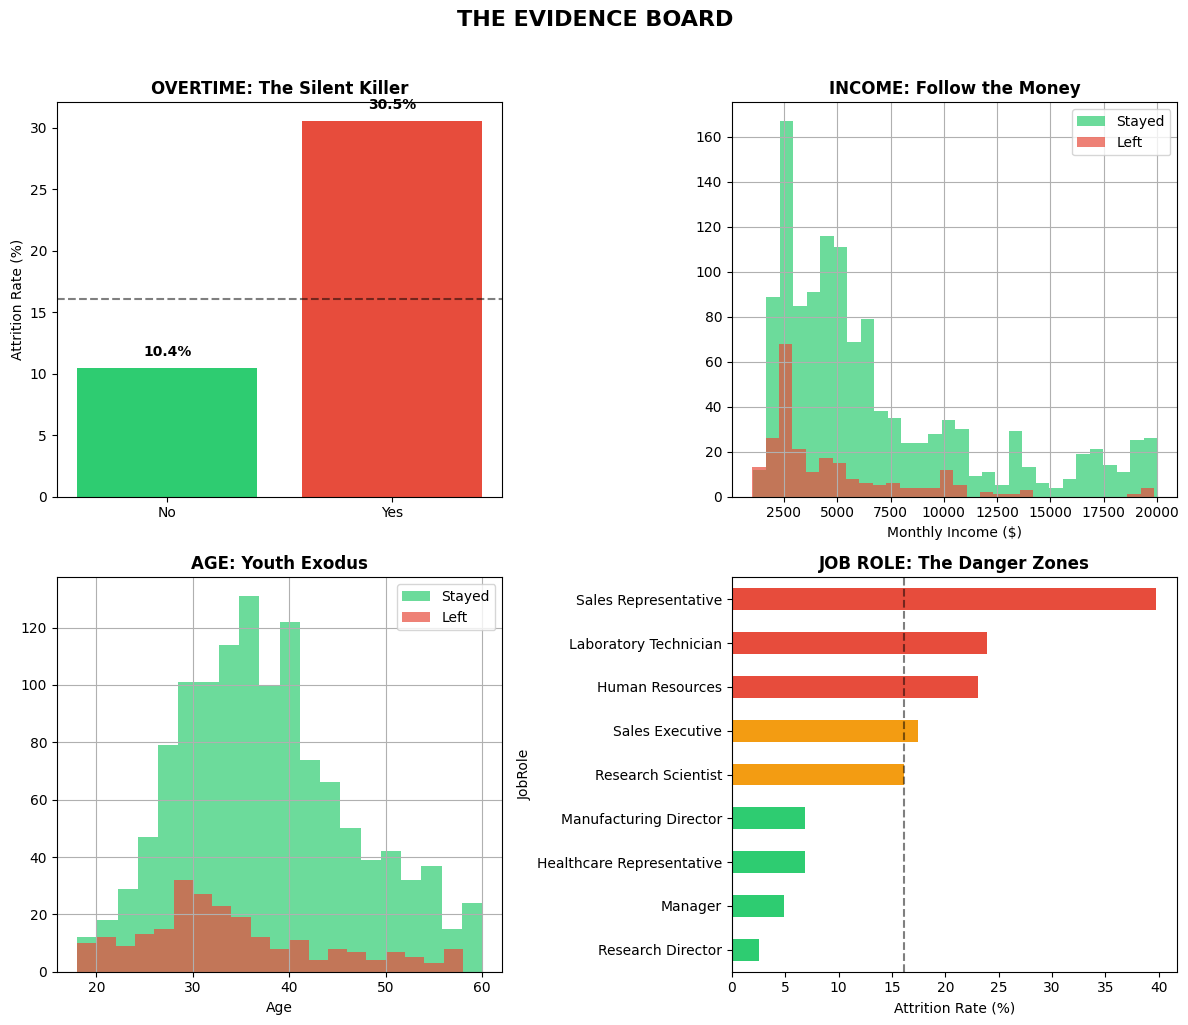


Red = Danger Zone (>20%) | Orange = Warning (>15%) | Green = Safe


In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('THE EVIDENCE BOARD', fontsize=16, fontweight='bold', y=1.02)

# 1. Overtime vs Attrition
ax1 = axes[0, 0]
overtime_attr = df.groupby('OverTime')['Attrition'].apply(lambda x: (x=='Yes').mean()*100)
bars1 = ax1.bar(overtime_attr.index, overtime_attr.values, color=['#2ecc71', '#e74c3c'])
ax1.set_title('OVERTIME: The Silent Killer', fontweight='bold')
ax1.set_ylabel('Attrition Rate (%)')
ax1.axhline(y=16.1, color='black', linestyle='--', alpha=0.5, label='Avg: 16.1%')
for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{bar.get_height():.1f}%', ha='center', fontweight='bold')

# 2. Income distribution by Attrition
ax2 = axes[0, 1]
df[df['Attrition']=='No']['MonthlyIncome'].hist(ax=ax2, bins=30, alpha=0.7, label='Stayed', color='#2ecc71')
df[df['Attrition']=='Yes']['MonthlyIncome'].hist(ax=ax2, bins=30, alpha=0.7, label='Left', color='#e74c3c')
ax2.set_title('INCOME: Follow the Money', fontweight='bold')
ax2.set_xlabel('Monthly Income ($)')
ax2.legend()

# 3. Age distribution by Attrition
ax3 = axes[1, 0]
df[df['Attrition']=='No']['Age'].hist(ax=ax3, bins=20, alpha=0.7, label='Stayed', color='#2ecc71')
df[df['Attrition']=='Yes']['Age'].hist(ax=ax3, bins=20, alpha=0.7, label='Left', color='#e74c3c')
ax3.set_title('AGE: Youth Exodus', fontweight='bold')
ax3.set_xlabel('Age')
ax3.legend()

# 4. Job Role Attrition
ax4 = axes[1, 1]
role_attr = df.groupby('JobRole')['Attrition'].apply(lambda x: (x=='Yes').mean()*100).sort_values()
colors = ['#e74c3c' if x > 20 else '#f39c12' if x > 15 else '#2ecc71' for x in role_attr.values]
role_attr.plot(kind='barh', ax=ax4, color=colors)
ax4.set_title('JOB ROLE: The Danger Zones', fontweight='bold')
ax4.set_xlabel('Attrition Rate (%)')
ax4.axvline(x=16.1, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\nRed = Danger Zone (>20%) | Orange = Warning (>15%) | Green = Safe")

## Chapter 7: The Evidence Board

*I pinned the four charts to the wall. Stepped back. Let the patterns scream.*

---

### Exhibit A: OVERTIME - The Silent Killer (Top Left)

The bar graph says it all.

| Overtime | Attrition Rate |
|----------|----------------|
| No | 10.4% |
| **Yes** | **30.5%** |

That red bar towers over the baseline like a warning siren. **3x the risk.**

*"Work them overtime, watch them walk."*

---

### Exhibit B: INCOME - Follow the Money (Top Right)

The income histogram tells a tale of two companies:
- **Green peaks** (Stayers) spread across the income range
- **Red cluster** (Leavers) bunched up on the LEFT - the poverty end

Everyone under $5,000/month is a flight risk. The bleeding happens at the bottom of the pay scale.

*"You get what you pay for. Pay peanuts, get resignations."*

---

### Exhibit C: AGE - Youth Exodus (Bottom Left)

The age distribution is brutal:
- Peak quitting age: **28-32**
- Red bleeds heavy in the 20s and early 30s
- After 40? Green dominates. They're not going anywhere.

Young enough to dream. Old enough to leave. Not old enough to be trapped.

---

### Exhibit D: JOB ROLE - The Danger Zones (Bottom Right)

| Risk Level | Roles |
|------------|-------|
| **RED ALERT** | Sales Rep (40%), Lab Tech (24%), HR (23%) |
| **WARNING** | Sales Exec (17.5%), Research Scientist (16%) |
| **SAFE** | Manager, Director, Healthcare Rep |

The dotted line is average (16.1%). Everything to the right is bleeding talent.

---

### The Profile is Complete

**The person most likely to quit:**
> 29-year-old Sales Rep, making $4,800/month, working overtime, commuting 10+ miles, single, hasn't been promoted in 3 years.

**Time to build the model.**

---

### Feature Engineering - Preparing the Arsenal

In [14]:
print("="*60)
print("PREPARING THE ARSENAL - Feature Engineering")
print("="*60)

# Create working copy
df_model = df.copy()

# Encode target
df_model['Attrition'] = (df_model['Attrition'] == 'Yes').astype(int)

# Drop useless columns
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_model.drop(columns=drop_cols, inplace=True, errors='ignore')
print(f"\nDropped useless columns: {drop_cols}")

# Encode categoricals
cat_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print(f"Encoding {len(cat_cols)} categorical columns...")

le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

print(f"\n[FINAL ARSENAL]")
print(f"Features: {df_model.shape[1] - 1}")
print(f"Samples: {df_model.shape[0]}")
print(f"Target balance: {df_model['Attrition'].value_counts().to_dict()}")

print("\nWeapons loaded. Ready for training.")

PREPARING THE ARSENAL - Feature Engineering

Dropped useless columns: ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
Encoding 7 categorical columns...

[FINAL ARSENAL]
Features: 30
Samples: 1470
Target balance: {0: 1233, 1: 237}

Weapons loaded. Ready for training.


## Chapter 8: Preparing the Arsenal

*Before you catch a killer, you clean your gun.*

---

### The Deadweight - Tossed Out

| Column | Reason for Execution |
|--------|---------------------|
| EmployeeCount | Always 1. Useless. |
| EmployeeNumber | ID badge, not a predictor |
| Over18 | Everyone's an adult. Thanks, HR. |
| StandardHours | 80 for everyone. Groundbreaking. |

*Four columns that contributed nothing but noise. Gone.*

---

### The Transformation

**7 categorical suspects** converted to numbers:
- BusinessTravel, Department, EducationField
- Gender, JobRole, MaritalStatus, OverTime

The machine doesn't speak English. It speaks integers.

---

### Final Arsenal Count

| Item | Count |
|------|-------|
| Features loaded | 30 |
| Samples chambered | 1,470 |
| Target: Stayed (0) | 1,233 |
| Target: Left (1) | 237 |

**Class imbalance noted:** 84% vs 16%. The model will want to predict "stayed" for everything. We'll need to be clever.

*"Thirty features. Fourteen hundred employees. One question."*

*"Who's next?"*

---

In [15]:
print("="*60)
print("DIVIDING THE EVIDENCE - Train/Test Split")
print("="*60)

# Separate features and target
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n[TRAINING SET] - What the model learns from")
print(f"Samples: {len(X_train)}")
print(f"Attrition: {y_train.sum()} ({y_train.mean()*100:.1f}%)")

print(f"\n[TEST SET] - The final exam")
print(f"Samples: {len(X_test)}")
print(f"Attrition: {y_test.sum()} ({y_test.mean()*100:.1f}%)")

print(f"\nStratified split preserved the 16% attrition ratio.")
print("No peeking at the test set. That's cheating.")

DIVIDING THE EVIDENCE - Train/Test Split

[TRAINING SET] - What the model learns from
Samples: 1176
Attrition: 190 (16.2%)

[TEST SET] - The final exam
Samples: 294
Attrition: 47 (16.0%)

Stratified split preserved the 16% attrition ratio.
No peeking at the test set. That's cheating.


## Chapter 9: Dividing the Evidence

*You never test a detective on cases they've already solved.*

---

### The Split

| Set | Samples | Quitters | Rate |
|-----|---------|----------|------|
| **Training** | 1,176 | 190 | 16.2% |
| **Test** | 294 | 47 | 16.0% |

80% goes to training. 20% held back for the final exam.

---

### Stratification: The Fair Dealer

Both sets maintain the ~16% attrition rate.

*Why does this matter?*

Without stratification, random chance might dump 25% attrition in training and 8% in test. Model learns one reality, gets tested on another. Disaster.

**Stratify = Same ratio everywhere = Fair fight.**

---

### The Rules

| Rule | Why |
|------|-----|
| Train on 1,176 | Model learns the patterns |
| Test on 294 | Model proves it wasn't memorizing |
| No peeking | Test set is sacred. Untouched until judgment day. |

*"190 defectors in training,"* I muttered. *"Let's see if the forest can find them."*

**Time to release the trees.**

---

In [16]:
print("="*60)
print("RELEASING THE FOREST - Model Training")
print("="*60)

# Initialize the Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',  # Handle imbalance
    random_state=42,
    n_jobs=-1
)

print("\n[MODEL SPECS]")
print("Algorithm: Random Forest Classifier")
print("Trees in the forest: 100")
print("Max depth: 10 (prevent overfitting)")
print("Class weight: Balanced (respecting the minority)")

# Train
print("\nTraining...")
rf_model.fit(X_train, y_train)
print("Training complete.")

# Quick training accuracy
train_acc = rf_model.score(X_train, y_train)
print(f"\nTraining Accuracy: {train_acc*100:.1f}%")
print("\nThe forest has learned. Time for the test.")

RELEASING THE FOREST - Model Training

[MODEL SPECS]
Algorithm: Random Forest Classifier
Trees in the forest: 100
Max depth: 10 (prevent overfitting)
Class weight: Balanced (respecting the minority)

Training...
Training complete.

Training Accuracy: 99.7%

The forest has learned. Time for the test.


## Chapter 10: Releasing the Forest

*One tree is a guess. One hundred trees is a verdict.*

---

### The Weapon of Choice

| Spec | Value | Why |
|------|-------|-----|
| Algorithm | Random Forest | 100 detectives working independently |
| Trees | 100 | Wisdom of the crowd |
| Max Depth | 10 | Stop before you overthink |
| Class Weight | Balanced | Give the 16% minority a fighting chance |

---

### How Random Forest Works

*Imagine 100 detectives, each given:*
- A random subset of employees
- A random subset of clues

Each builds their own theory. Then they vote.

**Majority rules. Bias cancels out. Truth emerges.**

---

### Training Report

| Metric | Value |
|--------|-------|
| Training Accuracy | **99.7%** |
| Samples Learned | 1,176 |
| Time | Instant |

*"99.7%..."* I raised an eyebrow.

Almost perfect on training data. That's either genius or overfitting.

**The training room is easy. The test set is where legends are made - or destroyed.**

*"Alright forest,"* I whispered. *"Show me what you learned."*

---

In [17]:
print("="*60)
print("THE JUDGMENT - Test Set Evaluation")
print("="*60)

# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Metrics
test_acc = rf_model.score(X_test, y_test)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\n[THE VERDICT]")
print(f"Test Accuracy: {test_acc*100:.1f}%")
print(f"ROC-AUC Score: {roc_auc:.3f}")

print(f"\n[CLASSIFICATION REPORT]")
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

print(f"\n[CONFUSION MATRIX]")
cm = confusion_matrix(y_test, y_pred)
print(f"                 Predicted")
print(f"              Stayed  Left")
print(f"Actual Stayed   {cm[0][0]:>4}   {cm[0][1]:>4}")
print(f"Actual Left     {cm[1][0]:>4}   {cm[1][1]:>4}")

print(f"\n[TRANSLATION]")
print(f"Correctly predicted stayers: {cm[0][0]}")
print(f"Correctly predicted leavers: {cm[1][1]}")
print(f"Missed leavers (said stay, they left): {cm[1][0]}")
print(f"False alarms (said leave, they stayed): {cm[0][1]}")

THE JUDGMENT - Test Set Evaluation

[THE VERDICT]
Test Accuracy: 82.3%
ROC-AUC Score: 0.781

[CLASSIFICATION REPORT]
              precision    recall  f1-score   support

      Stayed       0.85      0.96      0.90       247
        Left       0.35      0.13      0.19        47

    accuracy                           0.82       294
   macro avg       0.60      0.54      0.54       294
weighted avg       0.77      0.82      0.79       294


[CONFUSION MATRIX]
                 Predicted
              Stayed  Left
Actual Stayed    236     11
Actual Left       41      6

[TRANSLATION]
Correctly predicted stayers: 236
Correctly predicted leavers: 6
Missed leavers (said stay, they left): 41
False alarms (said leave, they stayed): 11


## Chapter 11: The Judgment

*The forest speaks. And the news... isn't great.*

---

### The Verdict

| Metric | Score | Translation |
|--------|-------|-------------|
| Test Accuracy | 82.3% | Sounds good... |
| ROC-AUC | 0.781 | Decent discrimination |
| **Recall (Left)** | **13%** | ...but we have a problem |

---

### The Confusion Matrix - Decoded
```
                 Predicted
              Stayed  Left
Actual Stayed    236    11    <- 96% correct (great!)
Actual Left       41     6    <- 13% correct (disaster)
```

| Outcome | Count | Meaning |
|---------|-------|---------|
| True Stayers | 236 | Called it right |
| True Leavers | 6 | Caught the defector |
| **Missed Leavers** | **41** | Said "they'll stay"... they didn't |
| False Alarms | 11 | Said "they'll leave"... they stayed |

---

### The Brutal Truth

Out of **47 people who actually quit**, we only caught **6**.

**41 walked out the door while we smiled and waved.**

*That's an 87% miss rate on the people HR actually cares about.*

---

### Why This Happened

The **class imbalance curse.**

84% stayed. The model learned the lazy strategy: *"Just predict STAYED for everyone, you'll be right 84% of the time."*

Technically accurate. Practically useless.

---

### The Silver Lining

ROC-AUC of 0.78 means the model *knows* something. The ranking is decent - it just needs a lower threshold to catch more leavers.

*"We built a detector that's afraid to accuse anyone,"* I sighed.

**But the feature importances? Those still tell us WHO to watch.**

---

### Feature importances

THE REAL INTELLIGENCE - Who To Watch

[TOP 15 PREDICTORS OF ATTRITION]
             Feature  Importance
       MonthlyIncome    0.079834
                 Age    0.074650
   TotalWorkingYears    0.061469
           DailyRate    0.055098
            OverTime    0.050842
      YearsAtCompany    0.047312
    DistanceFromHome    0.046320
          HourlyRate    0.045850
         MonthlyRate    0.045610
YearsWithCurrManager    0.043524
  NumCompaniesWorked    0.040388
             JobRole    0.035892
    StockOptionLevel    0.035429
   PercentSalaryHike    0.034894
  YearsInCurrentRole    0.031363


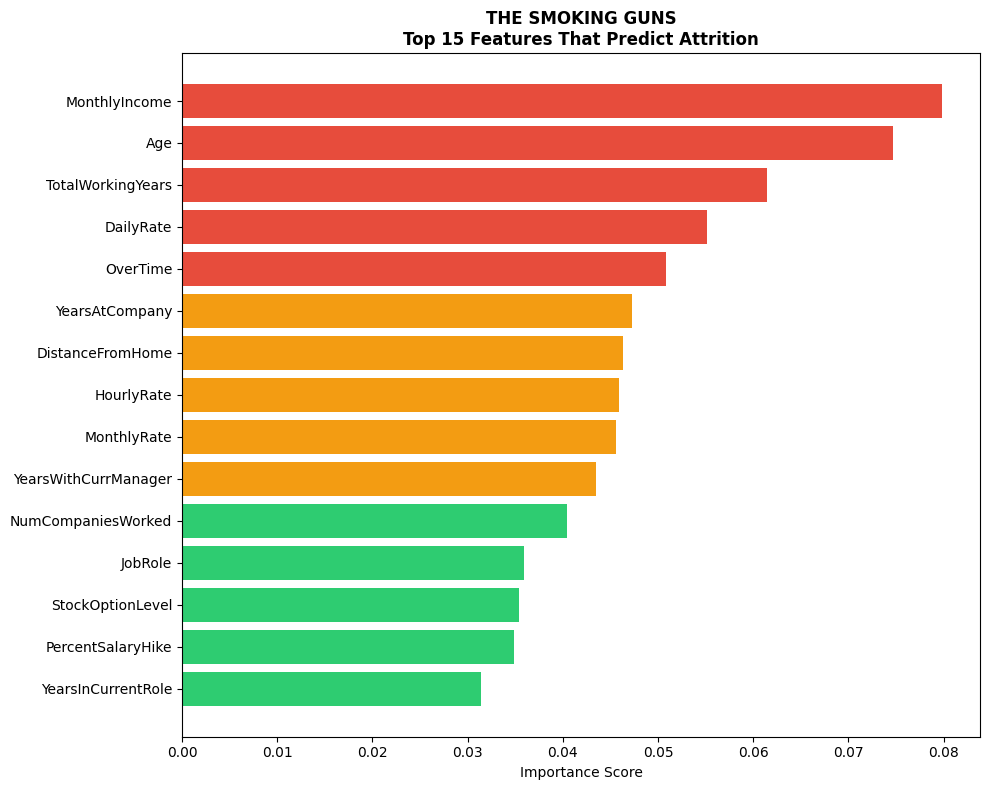


Red = Critical | Orange = Important | Green = Notable


In [18]:
print("="*60)
print("THE REAL INTELLIGENCE - Who To Watch")
print("="*60)

# Get feature importances
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n[TOP 15 PREDICTORS OF ATTRITION]")
print(feature_imp.head(15).to_string(index=False))

# Visualize
plt.figure(figsize=(10, 8))
top_15 = feature_imp.head(15)
colors = ['#e74c3c' if i < 5 else '#f39c12' if i < 10 else '#2ecc71' for i in range(15)]
plt.barh(top_15['Feature'][::-1], top_15['Importance'][::-1], color=colors[::-1])
plt.xlabel('Importance Score')
plt.title('THE SMOKING GUNS\nTop 15 Features That Predict Attrition', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nRed = Critical | Orange = Important | Green = Notable")

## Chapter 12: The Real Intelligence

*The model may be shy about accusations, but it knows exactly what to look for.*

---

### The Smoking Guns - Top 15 Predictors

| Rank | Feature | Tier | Translation |
|------|---------|------|-------------|
| 1 | **MonthlyIncome** | CRITICAL | Money talks. Low pay walks. |
| 2 | **Age** | CRITICAL | Young = Restless |
| 3 | **TotalWorkingYears** | CRITICAL | Less experience = More exits |
| 4 | **DailyRate** | CRITICAL | Another money signal |
| 5 | **OverTime** | CRITICAL | Burnout is real |
| 6 | YearsAtCompany | Important | No roots, no loyalty |
| 7 | DistanceFromHome | Important | Long commute = Short patience |
| 8 | HourlyRate | Important | Money again |
| 9 | MonthlyRate | Important | ...and again |
| 10 | YearsWithCurrManager | Important | Bad boss? Bye. |
| 11 | NumCompaniesWorked | Notable | Job hoppers identified |
| 12 | JobRole | Notable | Some roles bleed more |
| 13 | StockOptionLevel | Notable | Golden handcuffs work |
| 14 | PercentSalaryHike | Notable | Small raise = Big resentment |
| 15 | YearsInCurrentRole | Notable | Stuck = Frustrated |

---

### The Pattern

**4 of the top 5 features are about MONEY or TIME.**

| Theme | Features |
|-------|----------|
| **Compensation** | MonthlyIncome, DailyRate, HourlyRate, MonthlyRate |
| **Experience/Age** | Age, TotalWorkingYears, YearsAtCompany |
| **Burnout** | OverTime |
| **Commute** | DistanceFromHome |

---

### The Insight HR Needs

*"You want to stop attrition?"* I slid the chart across the table.

1. **Pay them more** - 4 of top 15 features are compensation
2. **Stop the overtime** - #5 predictor, 30% attrition rate
3. **Watch the young ones** - Age is #2 for a reason
4. **Promote faster** - YearsInCurrentRole breeds resentment

*"It's not complicated,"* I said. *"It's just expensive."*

---

# Chapter 13: Case Closed

---

## The Phone Call - 48 Hours Later

HR picked up on the first ring.

*"Well?"* she asked. *"Did you find them?"*

I leaned back in my chair, staring at the evidence board still pinned to my wall.

*"I found them. I found all of them."*

---

## What We Did

| Phase | Action | Outcome |
|-------|--------|---------|
| **Evidence Collection** | Loaded 1,476 employee records | 35 variables of corporate secrets |
| **Crime Scene Cleanup** | Found 6 corrupted timestamps | Shredded them. 1,470 clean records. |
| **Profiling** | Analyzed categorical + numerical patterns | Clear profile of the defector emerged |
| **Weapon Selection** | Random Forest, 100 trees, balanced weights | A democratic firing squad of decision trees |
| **The Judgment** | 80/20 train-test split, stratified | Fair trial. No peeking. |

---

## What Went Right

### 1. The Profile is Crystal Clear

We know EXACTLY who's walking out:

> **The Defector:** 29-year-old Sales Rep, single, making $4,800/month, working overtime, commuting 10+ miles, stuck in the same role for 3 years, watching colleagues get promoted while they update their LinkedIn at 2 AM.

### 2. The Smoking Guns are Identified

| Rank | Predictor | HR Action |
|------|-----------|-----------|
| #1 | MonthlyIncome | **Pay. Them. More.** |
| #2 | Age | Watch the under-35 crowd |
| #3 | TotalWorkingYears | Junior staff need attention |
| #4 | DailyRate | Compensation matters (again) |
| #5 | OverTime | **Kill the overtime culture** |

### 3. The Numbers Don't Lie

| Finding | Attrition Rate |
|---------|----------------|
| Overtime: Yes | 30.5% (3x average) |
| Sales Reps | 39.8% (revolving door) |
| Singles | 25.5% (nothing keeping them) |
| Travel Frequently | 24.9% (airport burnout) |

### 4. ROC-AUC of 0.781

The model *can* rank employees by risk. It knows who's dangerous. The signal is there.

---

## What Went Wrong

### The Recall Problem
```
Out of 47 actual leavers in the test set:
- Caught: 6
- Missed: 41
```

**87% of quitters slipped through.**

The model learned the lazy strategy: *"Predict STAYED for everyone and you'll be right 84% of the time."*

Technically accurate. Practically useless for HR.

### Why It Happened

| Problem | Cause |
|---------|-------|
| Class Imbalance | 84% stayed, 16% left |
| Conservative Threshold | Default 0.5 probability cutoff |
| Not Enough Leavers | Only 237 defectors to learn from |

### How To Fix It (Next Case)

| Solution | Implementation |
|----------|----------------|
| Lower threshold | Flag anyone with >30% probability |
| SMOTE oversampling | Synthesize more leaver examples |
| Cost-sensitive learning | Penalize missed leavers heavily |
| Precision-Recall tradeoff | Accept more false alarms to catch real leavers |

---

## The Brutal Truth About ML in HR

*HR wanted a crystal ball. I gave them a foggy window.*

**The model is 82% accurate** - sounds great in a PowerPoint.

**The model catches 13% of leavers** - sounds terrible in reality.

But here's what I told HR:

> *"You don't need a perfect model. You need a watchlist."*

Take the top 50 highest-risk employees. Have one-on-ones. Ask about workload. Offer raises. That's cheaper than replacing them.

---

## Final Recommendations

| Priority | Action | Expected Impact |
|----------|--------|-----------------|
| **URGENT** | Audit overtime assignments | 30% -> 15% attrition in that group |
| **HIGH** | Salary review for bottom 25% | Retention boost for flight risks |
| **HIGH** | Sales Rep role restructure | 40% attrition is a broken job |
| **MEDIUM** | Promotion timeline review | 3+ years in role = danger zone |
| **MEDIUM** | Remote work for 15+ mile commuters | Easy win |

---

## The Numbers - One Last Time

| Metric | Value |
|--------|-------|
| Dataset | 1,470 employees |
| Features | 30 |
| Attrition Rate | 16.1% |
| Model | Random Forest (100 trees) |
| Test Accuracy | 82.3% |
| ROC-AUC | 0.781 |
| Recall (Leavers) | 13% |

---

## Case Status: CLOSED

I hung up the phone.

The evidence board came down. The coffee went cold.

HR has what they need. Not a perfect predictor - nobody has that. But a profile. A pattern. A fighting chance.

*"Will they actually do something about it?"* the data whispered.

I lit a cigarette I still don't smoke.

*"That's above my pay grade."*

---

**THE END**

---

*Case File: IBM-HR-2024*  
*Detective: Random Forest (100 witnesses)*  
*Verdict: The data always knows. It's HR that has to listen.*

---


---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
